In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transform = transforms.ToTensor() #image to tensors transformation

In [3]:
train_data = datasets.MNIST(root='C:/Works/Personal/repo/DatasetFolder/MNISTDataset', train=True, download=True, transform=transform)

In [4]:
test_data = datasets.MNIST(root='C:/Works/Personal/repo/DatasetFolder/MNISTDataset', train=False, download=True, transform=transform)

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: C:/Works/Personal/repo/DatasetFolder/MNISTDataset
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: C:/Works/Personal/repo/DatasetFolder/MNISTDataset
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [7]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)

test_loader = DataLoader(test_data, batch_size=50, shuffle=False)

In [10]:
conv1 = nn.Conv2d(1,6,3,1) #1 = channel for greyscale, 6 (arbitrary choice) = number of feauture maps in putput channel/feature extraction, 3 = 3 x 3 filter size, 1= padding
conv2 = nn.Conv2d(6,16,3,1) #6 = the output channel of conv1 is input filters in conv2


In [12]:
for i, (X_train, y_train) in enumerate(train_data):
    break

In [13]:
X_train.shape

torch.Size([1, 28, 28])

In [14]:
x = X_train.view(1,1,28,28)

In [15]:
x

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [16]:
x.shape #1 batch, 1 color channel of image-size 28 by 28 

torch.Size([1, 1, 28, 28])

In [17]:
x = F.relu(conv1(x))

In [18]:
x.shape

torch.Size([1, 6, 26, 26])

In [19]:
x = F.max_pool2d(x,2,2) #2 kernel size and 2 s stride

In [21]:
x.shape

torch.Size([1, 6, 13, 13])

In [22]:
x = F.relu(conv2(x))

In [23]:
x.shape

torch.Size([1, 16, 11, 11])

In [24]:
x = F.max_pool2d(x,2,2)

In [25]:
x.shape

torch.Size([1, 16, 5, 5])

In [26]:
#flattening the data
x = x.view(-1, 5*5*16)

In [27]:
x.shape

torch.Size([1, 400])

In [28]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(5*5*16, 120) #faltenning the tensor, 120 (arbitrary): inital number of neurones in the network
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*5*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [29]:
torch.manual_seed(42)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [31]:
for param in model.parameters():
    print(param.numel())

54
6
864
16
48000
120
10080
84
840
10


In [32]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [33]:
import time
start_time = time.time()

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    #running the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        #applying the model
        y_pred = model(X_train)  # we don't flatten X-train here
        loss = criterion(y_pred, y_train)
 
        #tallying the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        #updating parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%600 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    #running the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            #applying the model
            y_val = model(X_test)

            #tallying the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed     

epoch:  0  batch:  600 [  6000/60000]  loss: 0.21188490  accuracy:  78.233%
epoch:  0  batch: 1200 [ 12000/60000]  loss: 0.58768761  accuracy:  85.433%
epoch:  0  batch: 1800 [ 18000/60000]  loss: 0.03002630  accuracy:  88.539%
epoch:  0  batch: 2400 [ 24000/60000]  loss: 0.02856987  accuracy:  90.396%
epoch:  0  batch: 3000 [ 30000/60000]  loss: 0.01619262  accuracy:  91.543%
epoch:  0  batch: 3600 [ 36000/60000]  loss: 0.00392615  accuracy:  92.347%
epoch:  0  batch: 4200 [ 42000/60000]  loss: 0.07892600  accuracy:  92.938%
epoch:  0  batch: 4800 [ 48000/60000]  loss: 0.00173595  accuracy:  93.458%
epoch:  0  batch: 5400 [ 54000/60000]  loss: 0.00021752  accuracy:  93.889%
epoch:  0  batch: 6000 [ 60000/60000]  loss: 0.00123056  accuracy:  94.245%
epoch:  1  batch:  600 [  6000/60000]  loss: 0.03455487  accuracy:  97.967%
epoch:  1  batch: 1200 [ 12000/60000]  loss: 0.25245315  accuracy:  97.792%
epoch:  1  batch: 1800 [ 18000/60000]  loss: 0.15286988  accuracy:  97.833%
epoch:  1  b

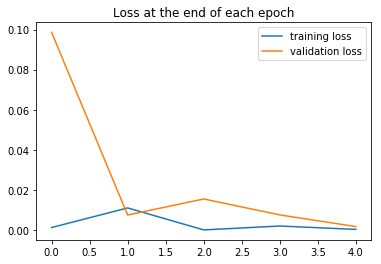

In [34]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

In [35]:
test_losses

[tensor(0.0987),
 tensor(0.0075),
 tensor(0.0155),
 tensor(0.0075),
 tensor(0.0017)]

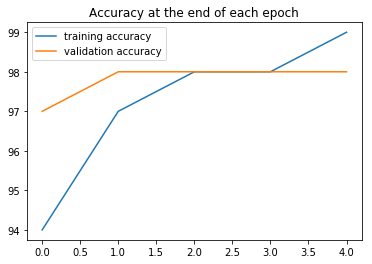

In [36]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [37]:
#extracting the data all at once, not in batches
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [38]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9848/10000 =  98.480%


In [41]:
# printing a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

# printing the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 977    0    3    2    2    2    4    1   10    2]
 [   0 1132    5    1    1    0    3    7    1    2]
 [   0    0 1015    1    0    0    0    4    3    0]
 [   0    2    0 1001    0   11    0    1    3    4]
 [   0    0    1    0  966    0    1    0    2    2]
 [   0    0    0    1    0  863    2    0    0    2]
 [   1    0    0    0    3    4  948    0    0    0]
 [   1    0    5    0    0    1    0 1005    1    2]
 [   1    1    3    4    1    4    0    2  948    2]
 [   0    0    0    0    9    7    0    8    6  993]]


In [42]:
misses = np.array([])
for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses = np.append(misses,i).astype('int64')
        
#displaying the number of misses
len(misses)

152

In [43]:
# Seting up an iterator to feed batched rows
r = 12   # row size
row = iter(np.array_split(misses,len(misses)//r+1))

Index: [  18  111  175  184  247  321  340  412  445  460  495  582]
Label: [   3    7    7    8    4    2    5    5    6    5    8    8]
Guess: [   8    1    1    3    6    7    3    3    0    9    0    2]


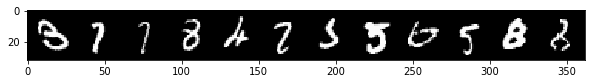

In [44]:
nextrow = next(row)
print("Index:", nextrow)
print("Label:", y_test.index_select(0,torch.tensor(nextrow)).numpy())
print("Guess:", predicted.index_select(0,torch.tensor(nextrow)).numpy())

images = X_test.index_select(0,torch.tensor(nextrow))
im = make_grid(images, nrow=r)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

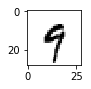

In [45]:
x = 2019
plt.figure(figsize=(1,1))
plt.imshow(test_data[x][0].reshape((28,28)), cmap="gist_yarg");

In [46]:
model.eval()
with torch.no_grad():
    new_pred = model(test_data[x][0].view(1,1,28,28)).argmax()
print("Predicted value:",new_pred.item())

Predicted value: 9


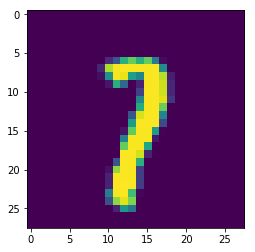

In [47]:
plt.imshow(test_data[111][0].reshape(28,28))

In [48]:
model.eval()
with torch.no_grad():
    new_pred = model(test_data[111][0].view(1,1,28,28)).argmax()
print("Predicted value:",new_pred.item())

Predicted value: 1
